# Exploratory Data Analysis: Airbnb Listings - Edinburgh 

This project involves performing an exploratory data analysis (EDA) on Airbnb listings data for a particular city. The analysis will focus on factors such as price, availability, location, and property type to identify trends and patterns in the demand for Airbnb listings in the city. The project will include data cleaning, visualization, and statistical analysis using tools such as Python and Jupyter Notebook.

## Importing Libraries and Loading Dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os as os
import sys as sys
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
#import ydata_profiling as pp
#from ydata_profiling import ProfileReport

In [6]:
#if csv/if excel/if sql/ allow for reading different types of files
def read (filename, filetype):
    if filetype == '.csv':
        df = pd.read_csv(filename)
    elif filetype == '.xslx':
        df = pd.read_excel(filename)
    elif filetype == '.sql':
        #df = pd.read_sql(sql, con, index_col=None) ##get the right libraries
        print('Please use sql engine and connect to sql database')
    return df

In [2]:
def listfiles (directory, extension):
    # user can input any directory here as well
    # if the user wants another file added, just add it to this directory and rerun the code
    filenames = []
    for file in os.listdir():
        if file.endswith(extension):
            filenames.append(file)
        else:
            continue
    return filenames

In [3]:
# list directory
directory = 'EDA-airbnb-project'
extension = ('.csv', '.xslx', '.sql')
filenames = listfiles(directory, extension)

NameError: name 'os' is not defined

In [ ]:
filenames

In [ ]:
readfiles = []
renames = []
for i in range(len(filenames)):
    print('File to be read:', filenames[i],'\n')
    index = os.path.splitext(filenames[i])  ##returns tuple
    file_name = index[0]
    renames.append(file_name)
    readfiles.append(file_name)
    print('File name:', file_name,'\n')
    file_ext = index[1]
    print('File extension:', file_ext,'\n')
    readfiles[i] = read(filenames[i], file_ext)

In [18]:
dfcount = len(readfiles)
dfcount

1

## Simple Data Exploration

In [19]:
df = readfiles[0]

In [20]:
type(df)

pandas.core.frame.DataFrame

In [21]:
#dfprofile = pp.ProfileReport(df)

In [22]:
#dfprofile.to_file("listings.html")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7696 entries, 0 to 7695
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7696 non-null   int64  
 1   listing_url                                   7696 non-null   object 
 2   scrape_id                                     7696 non-null   int64  
 3   last_scraped                                  7696 non-null   object 
 4   source                                        7696 non-null   object 
 5   name                                          7696 non-null   object 
 6   description                                   7645 non-null   object 
 7   neighborhood_overview                         5383 non-null   object 
 8   picture_url                                   7696 non-null   object 
 9   host_id                                       7696 non-null   i

In [24]:
dfcolumns = df.columns

In [25]:
dfcolumns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [26]:
dtypes = df.dtypes

In [27]:
for i in range(len(dtypes)):
    print(df[dfcolumns[i]].name,'---------->',dtypes[i])

id ----------> int64
listing_url ----------> object
scrape_id ----------> int64
last_scraped ----------> object
source ----------> object
name ----------> object
description ----------> object
neighborhood_overview ----------> object
picture_url ----------> object
host_id ----------> int64
host_url ----------> object
host_name ----------> object
host_since ----------> object
host_location ----------> object
host_about ----------> object
host_response_time ----------> object
host_response_rate ----------> object
host_acceptance_rate ----------> object
host_is_superhost ----------> object
host_thumbnail_url ----------> object
host_picture_url ----------> object
host_neighbourhood ----------> object
host_listings_count ----------> int64
host_total_listings_count ----------> int64
host_verifications ----------> object
host_has_profile_pic ----------> object
host_identity_verified ----------> object
neighbourhood ----------> object
neighbourhood_cleansed ----------> object
neighbourhood_gro

In [28]:
df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,15420,https://www.airbnb.com/rooms/15420,20230612205714,2023-06-13,city scrape,Rental unit in Edinburgh · ★4.98 · 1 bedroom ·...,"Stunning, spacious ground floor apartment minu...","The neighbourhood is in the historic New Town,...",https://a0.muscache.com/pictures/cf69631f-4194...,60423,https://www.airbnb.com/users/show/60423,Charlotte,2009-12-06,"Edinburgh, United Kingdom","I have a background in property, having worked...",within a few hours,100%,95%,t,https://a0.muscache.com/im/users/60423/profile...,https://a0.muscache.com/im/users/60423/profile...,NaN,3,6,"['email', 'phone']",t,t,"Edinburgh, City of Edinburgh, United Kingdom","Old Town, Princes Street and Leith Street",NaN,55.957590,-3.188050,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Clothing storage"", ...",$126.00,3,30,1,3,30,30,3.0,30.0,NaN,t,1,2,6,39,2023-06-13,492,81,8,2011-01-18,2023-06-11,4.98,4.98,4.96,4.97,4.98,4.98,4.91,NaN,f,1,1,0,0,3.26
1,790170,https://www.airbnb.com/rooms/790170,20230612205714,2023-06-12,city scrape,Condo in Edinburgh · ★4.96 · 2 bedrooms · 2 be...,"Great views from floor to ceiling windows, spa...",Waterfront apartment in residential area.,https://a0.muscache.com/pictures/15237783/ddb5...,4155880,https://www.airbnb.com/users/show/4155880,Don,2012-11-15,"Penang, Malaysia","Originally from Edinburgh, UK, presently enjoy...",within a few hours,100%,90%,t,https://a0.muscache.com/im/users/4155880/profi...,https://a0.muscache.com/im/users/4155880/profi...,NaN,2,2,"['email', 'phone']",t,t,"Edinburgh, United Kingdom",Western Harbour and Leith Docks,NaN,55.986130,-3.188040,Entire condo,Entire home/apt,6,NaN,2.5 baths,2.0,2.0,"[""Hangers"", ""Elevator"", ""Coffee maker"", ""Water...",$269.00,3,30,3,7,30,30,3.3,30.0,NaN,t,0,4,6,23,2023-06-12,97,21,0,2013-07-19,2023-04-15,4.96,4.96,4.69,4.92,4.98,4.87,4.80,NaN,f,1,1,0,0,0.80
2,24288,https://www.airbnb.com/rooms/24288,20230612205714,2023-06-13,city scrape,Loft in Edinburgh · ★4.62 · 2 bedrooms · 2 bed...,Upper level of duplex. Boho rustic-chic former...,"Boho, studenty, cool neighbourhood",https://a0.muscache.com/pictures/3460007/88731...,46498,https://www.airbnb.com/users/show/46498,Gordon,2009-10-17,"Edinburgh, United Kingdom",Principal\r\nStudio DuB\r\nArchitecture & Plan...,within an hour,90%,100%,t,https://a0.muscache.com/im/users/46498/profile...,https://a0.muscache.com/im/users/46498/profile...,Southside,1,1,"['email', 'phone']",t,t,"Edinburgh, EH8 9JW, United Kingdom","Canongate, Southside and Dumbiedykes",NaN,55.944983,-3.185293,Entire loft,Entire home/apt,4,NaN,1.5 baths,2.0,2.0,"[""Carbon monoxide alarm"", ""Hangers"", ""Drying r...",$95.00,3,365

In [29]:
df.shape

(7696, 75)

In [30]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.696000e+03,7.696000e+03,7.696000e+03,7696.000000,7696.000000,0.0,7696.000000,7696.000000,7696.000000,0.0,5558.000000,7604.000000,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000,0.0,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000,7696.000000,6869.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,7696.000000,7696.000000,7696.000000,7696.000000,6869.000000
mean,2.528283e+17,2.023061e+13,1.443660e+08,17.274558,35.138643,NaN,55.950727,-3.197940,3.581341,NaN,1.901403,2.114808,4.173727,471.807562,3.451143,5.431003,650.400728,705.456341,4.447557,691.963267,NaN,5.615904,13.968165,23.545998,98.020660,70.149168,19.968035,2.248701,4.751418,4.814015,4.754750,4.845332,4.860619,4.801535,4.676779,8.197765,6.869283,1.285993,0.017412,1.916547
std,3.503670e+17,5.781626e-01,1.530252e+08,99.874150,232.730848,NaN,0.015852,0.038578,2.116708,NaN,1.171152,1.653488,27.404597,474.207075,18.935209,24.297478,501.934500,485.875785,22.183971,483.661576,NaN,7.583082,15.903883,24.169495,110.363429,109.642016,25.050483,2.932376,0.394864,0.321157,0.342043,0.293967,0.272710,0.261897,0.360113,23.008180,21.402339,3.469940,0.363662,1.875002
min,1.542000e+04,2.023061e+13,2.784000e+03,1.000000,1.000000,NaN,55.858160,-3.426640,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.031484e+07,2.023061e+13,2.259754e+07,1.000000,1.000000,NaN,55.942110,-3.212033,2.000000,NaN,1.000000,1.000000,1.000000,30.000000,1.000000,2.000000,30.000000,90.000000,2.000000,90.000000,NaN,0.000000,1.000000,3.000000,9.000000,5.000000,1.000000,0.000000,4.680000,4.780000,4.670000,4.820000,4.830000,4.730000,4.600000,1.000000,1.000000,0.000000,0.000000,0.530000
50%,4.069056e+07,2.023061e+13,7.746627e+07,2.000000,3.000000,NaN,55.951300,-3.193165,3.000000,NaN,2.000000,2.000000,2.000000,365.000000,2.000000,3.000000,1075.500000,1125.000000,2.000000,1122.500000,NaN,3.000000,8.000000,16.000000,49.000000,25.000000,10.000000,1.000000,4.850000,4.900000,4.860000,4.930000,4.940000,4.870000,4.750000,1.000000,1.000000,0.000000,0.000000,1.340000
75%,6.573320e+17,2.023061e+13,2.252176e+08,5.000000,7.000000,NaN,55.960373,-3.177125,4.000000,NaN,2.000000,3.000000,3.000000,1125.000000,3.000000,4.000000,1125.000000,1125.000000,3.100000,1125.000000,NaN,8.000000,22.000000,37.000000,164.000000,87.250000,30.000000,4.000000,4.960000,4.980000,4.970000,5.000000,5.000000,4.960000,4.870000,4.000000,2.000000,1.000000,0.000000,2.770000
max,9.122711e+17,2.023061e+13,5.194352e+08,2191.000000,5226.000000,NaN,55.991170,-3.078950,16.000000,NaN,40.000000,40.000000,1000.000000,1125.000000,1000.000000,1000.000000,1125.000000,1125.000000,1000.000000,1125.000000,NaN,30.000000,60.000000,90.000000,365.000000,1622.000000,410.000000,37.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,155.000000,144.000000,28.000000,9.000000,32.660000


In [31]:
df.describe(include=['object', 'bool'])

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,7696,7696,7696,7696,7645,5383,7696,7696,7696,7696,6300,4539,6312,6312,6813,5565,7696,7696,2965,7696,7696,7696,5383,7696,7696,7696,7686,7696,7696,7696,7696,6869,6869,26,7696
unique,7696,3,2,3889,7440,4748,7604,4872,2034,2614,257,2562,4,56,84,2,4770,4770,53,6,2,2,87,111,50,4,31,7366,593,2,3,2193,791,16,2
top,https://www.airbnb.com/rooms/15420,2023-06-13,city scrape,Rental unit in Edinburgh · ★New · 1 bedroom · ...,<b>The space</b><br />We have a bar that is op...,The Edinburgh Thistle Hotel is situated in the...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/37563463,Altido,2015-07-05,"Edinburgh, United Kingdom","Dear guest, \n\nWelcome to an ALTIDO home.\n\n...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/1a71e...,https://a0.muscache.com/im/pictures/user/1a71e...,New Town,"['email', 'phone']",t,t,"Edinburgh, Scotland, United Kingdom","Old Town, Princes Street and Leith Street",Entire rental unit,Entire home/apt,1 bath,"[""Clothing storage"", ""Hangers"", ""Self check-in...",$100.00,t,2023-06-13,2022-08-07,2023-05-29,271 8452 90,f
freq,1,5332,6121,79,12,21,5,155,180,160,5151,155,4934,4922,2847,3595,155,155,554,5972,7545,7074,4144,815,3247,5389,3762,18,192,7671,5332,48,356,5,4890


In [32]:
#identify duplicated rows
def duplicaterows(Dataframe):
    duplicaterows = Dataframe[Dataframe.duplicated()]
    if duplicaterows.empty:
        print('No duplicated rows found')
        df = Dataframe##don't drop duplicates
    else:
        print(duplicaterows)##drop duplicates
        df = Dataframe.drop_duplicates(keep = 'last', inplace = True)
    return duplicaterows, df

In [33]:
def duplicatecols(Dataframe):
    duplicatecols = Dataframe.columns[Dataframe.columns.duplicated()]
    if duplicatecols.empty:
        print('There are no duplicated cols in this dataframe')
        df = Dataframe##don't drop duplicates
    else:
        print(duplicatecols)
        df = Dataframe.drop(columns = duplicatecols, inplace = True)##drop duplicates
    return duplicatecols, df

In [34]:
duplicaterows, df = duplicaterows(df)

No duplicated rows found


In [35]:
duplicatecols, df = duplicatecols(df)

There are no duplicated cols in this dataframe


In [36]:
#identify null values
nulllist = []
for i in range(len(dfcolumns)):
    if df[dfcolumns[i]].isna().sum() != 0 :
        nulllist.append(dfcolumns[i])

In [37]:
nulllist##columns with null values

['description',
 'neighborhood_overview',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'calendar_updated',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

In [38]:
df['description'].value_counts().head()  ##default is descending order

description
<b>The space</b><br />We have a bar that is open from 10am - 11PM every day for guests.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       12
The whole group will enjoy easy access to everything from this centrally located place.                                    

In [39]:
type(df[nulllist[0]])

pandas.core.series.Series

In [40]:
#df['neighbourhood_group_cleansed'].value_counts().index[0]

In [41]:
#fill all null values with max value_count being the most frequent in df
#check if column is null
for i in range(len(nulllist)):
    series = df[nulllist[i]].value_counts()
    if series.empty == True:
        #fill = 'Default'
        print('Fill:', nulllist[i], ' column with:')
        print('No fill, since column is empty, so drop')
        df.drop(nulllist[i], axis = 1, inplace = True)
    else:
        fill = df[nulllist[i]].value_counts().index[0]
        print('Fill:', nulllist[i], ' column with:')
        print(fill)
        df[nulllist[i]].fillna(fill, inplace = True)
    print('__________________________________________________')

Fill: description  column with:
<b>The space</b><br />We have a bar that is open from 10am - 11PM every day for guests.
__________________________________________________
Fill: neighborhood_overview  column with:
The Edinburgh Thistle Hotel is situated in the heart of Edinburgh's prestigious West End. Within a short stroll from Princes Street and George Street's wide variety of boutiques, cafes, bars and restaurants, our enviable city centre location will ensure you enjoy all that Edinburgh has to offer
__________________________________________________
Fill: host_location  column with:
Edinburgh, United Kingdom
__________________________________________________
Fill: host_about  column with:
Dear guest, 

Welcome to an ALTIDO home.

We take pride in helping thousands of busy hosts across Europe to rent their properties professionally so you can have the stay of your dreams.
This and every other home we manage provides hotel-like quality services, such as professional cleaning before y

In [42]:
#drop rows where all elements are missing
df.dropna(how ='all', inplace = True)

In [43]:
type(df)

pandas.core.frame.DataFrame

In [44]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,15420,https://www.airbnb.com/rooms/15420,20230612205714,2023-06-13,city scrape,Rental unit in Edinburgh · ★4.98 · 1 bedroom ·...,"Stunning, spacious ground floor apartment minu...","The neighbourhood is in the historic New Town,...",https://a0.muscache.com/pictures/cf69631f-4194...,60423,https://www.airbnb.com/users/show/60423,Charlotte,2009-12-06,"Edinburgh, United Kingdom","I have a background in property, having worked...",within a few hours,100%,95%,t,https://a0.muscache.com/im/users/60423/profile...,https://a0.muscache.com/im/users/60423/profile...,New Town,3,6,"['email', 'phone']",t,t,"Edinburgh, City of Edinburgh, United Kingdom","Old Town, Princes Street and Leith Street",55.957590,-3.188050,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Clothing storage"", ...",$126.00,3,30,1,3,30,30,3.0,30.0,t,1,2,6,39,2023-06-13,492,81,8,2011-01-18,2023-06-11,4.98,4.98,4.96,4.97,4.98,4.98,4.91,271 8452 90,f,1,1,0,0,3.26
1,790170,https://www.airbnb.com/rooms/790170,20230612205714,2023-06-12,city scrape,Condo in Edinburgh · ★4.96 · 2 bedrooms · 2 be...,"Great views from floor to ceiling windows, spa...",Waterfront apartment in residential area.,https://a0.muscache.com/pictures/15237783/ddb5...,4155880,https://www.airbnb.com/users/show/4155880,Don,2012-11-15,"Penang, Malaysia","Originally from Edinburgh, UK, presently enjoy...",within a few hours,100%,90%,t,https://a0.muscache.com/im/users/4155880/profi...,https://a0.muscache.com/im/users/4155880/profi...,New Town,2,2,"['email', 'phone']",t,t,"Edinburgh, United Kingdom",Western Harbour and Leith Docks,55.986130,-3.188040,Entire condo,Entire home/apt,6,2.5 baths,2.0,2.0,"[""Hangers"", ""Elevator"", ""Coffee maker"", ""Water...",$269.00,3,30,3,7,30,30,3.3,30.0,t,0,4,6,23,2023-06-12,97,21,0,2013-07-19,2023-04-15,4.96,4.96,4.69,4.92,4.98,4.87,4.80,271 8452 90,f,1,1,0,0,0.80
2,24288,https://www.airbnb.com/rooms/24288,20230612205714,2023-06-13,city scrape,Loft in Edinburgh · ★4.62 · 2 bedrooms · 2 bed...,Upper level of duplex. Boho rustic-chic former...,"Boho, studenty, cool neighbourhood",https://a0.muscache.com/pictures/3460007/88731...,46498,https://www.airbnb.com/users/show/46498,Gordon,2009-10-17,"Edinburgh, United Kingdom",Principal\r\nStudio DuB\r\nArchitecture & Plan...,within an hour,90%,100%,t,https://a0.muscache.com/im/users/46498/profile...,https://a0.muscache.com/im/users/46498/profile...,Southside,1,1,"['email', 'phone']",t,t,"Edinburgh, EH8 9JW, United Kingdom","Canongate, Southside and Dumbiedykes",55.944983,-3.185293,Entire loft,Entire home/apt,4,1.5 baths,2.0,2.0,"[""Carbon monoxide alarm"", ""Hangers"", ""Drying r...",$95.00,3,365,2,3,1125,1125,3.0,1125.0,t,2,2,2,46,2023-06-13,274,46,3,2010-

In [45]:
#return 2 lists, Numerical columns and Categorical columns
def types(Dataframe):
    numerical = Dataframe.select_dtypes(exclude = ['object']).columns.tolist()
    categorical = Dataframe.select_dtypes(include = ['object']).columns.tolist()
    return numerical, categorical

In [46]:
numerical, categorical = types(df)

In [47]:
numerical

['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month']

In [48]:
categorical

['listing_url',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'price',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'license',
 'instant_bookable']

## ANALYSIS: price / location / availability / property_type

### Univariate Analysis: PRICE

In [49]:
##PRICE
#it is a categorical field
'price' in categorical

True

In [50]:
df.shape

(7696, 72)

In [52]:
#can't be answered without to int first, cannot be parsed so will work with categorical data only
#df['price'] = df['price'].apply(pd.to_numeric)
#sorteddf['price'] = sorteddf['price'].apply(pd.to_numeric)
df.price.unique()

array(['$126.00', '$269.00', '$95.00', '$172.00', '$361.00', '$264.00',
       '$177.00', '$117.00', '$48.00', '$136.00', '$157.00', '$141.00',
       '$90.00', '$56.00', '$150.00', '$64.00', '$40.00', '$155.00',
       '$190.00', '$221.00', '$225.00', '$270.00', '$166.00', '$215.00',
       '$180.00', '$195.00', '$105.00', '$230.00', '$38.00', '$279.00',
       '$110.00', '$100.00', '$68.00', '$65.00', '$119.00', '$229.00',
       '$152.00', '$200.00', '$125.00', '$228.00', '$55.00', '$96.00',
       '$127.00', '$204.00', '$104.00', '$265.00', '$103.00', '$203.00',
       '$78.00', '$130.00', '$170.00', '$75.00', '$626.00', '$615.00',
       '$995.00', '$164.00', '$444.00', '$235.00', '$329.00', '$469.00',
       '$79.00', '$160.00', '$41.00', '$154.00', '$70.00', '$109.00',
       '$201.00', '$35.00', '$137.00', '$129.00', '$214.00', '$85.00',
       '$1,500.00', '$222.00', '$278.00', '$89.00', '$220.00', '$72.00',
       '$106.00', '$59.00', '$151.00', '$74.00', '$186.00', '$132.00'

In [53]:
df['price'] = df['price'].str.replace("$", "")
df['price'] = df['price'].str.replace(",", "")

In [54]:
df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,15420,https://www.airbnb.com/rooms/15420,20230612205714,2023-06-13,city scrape,Rental unit in Edinburgh · ★4.98 · 1 bedroom ·...,"Stunning, spacious ground floor apartment minu...","The neighbourhood is in the historic New Town,...",https://a0.muscache.com/pictures/cf69631f-4194...,60423,https://www.airbnb.com/users/show/60423,Charlotte,2009-12-06,"Edinburgh, United Kingdom","I have a background in property, having worked...",within a few hours,100%,95%,t,https://a0.muscache.com/im/users/60423/profile...,https://a0.muscache.com/im/users/60423/profile...,New Town,3,6,"['email', 'phone']",t,t,"Edinburgh, City of Edinburgh, United Kingdom","Old Town, Princes Street and Leith Street",55.95759,-3.18805,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Clothing storage"", ...",126.00,3,30,1,3,30,30,3.0,30.0,t,1,2,6,39,2023-06-13,492,81,8,2011-01-18,2023-06-11,4.98,4.98,4.96,4.97,4.98,4.98,4.91,271 8452 90,f,1,1,0,0,3.26
1,790170,https://www.airbnb.com/rooms/790170,20230612205714,2023-06-12,city scrape,Condo in Edinburgh · ★4.96 · 2 bedrooms · 2 be...,"Great views from floor to ceiling windows, spa...",Waterfront apartment in residential area.,https://a0.muscache.com/pictures/15237783/ddb5...,4155880,https://www.airbnb.com/users/show/4155880,Don,2012-11-15,"Penang, Malaysia","Originally from Edinburgh, UK, presently enjoy...",within a few hours,100%,90%,t,https://a0.muscache.com/im/users/4155880/profi...,https://a0.muscache.com/im/users/4155880/profi...,New Town,2,2,"['email', 'phone']",t,t,"Edinburgh, United Kingdom",Western Harbour and Leith Docks,55.98613,-3.18804,Entire condo,Entire home/apt,6,2.5 baths,2.0,2.0,"[""Hangers"", ""Elevator"", ""Coffee maker"", ""Water...",269.00,3,30,3,7,30,30,3.3,30.0,t,0,4,6,23,2023-06-12,97,21,0,2013-07-19,2023-04-15,4.96,4.96,4.69,4.92,4.98,4.87,4.80,271 8452 90,f,1,1,0,0,0.80


#### What is the highest price?

In [55]:
df['price'] = df['price'].apply(pd.to_numeric)  #convert to numeric data
df['price'] = df['price'].astype('int')

In [56]:
df['price'].dtypes

dtype('int32')

In [172]:
sorteddf = df.sort_values(by='price', ascending=False)
top5array = sorteddf['price'].unique()
#top5array
for i in range(5):
    print(top5array[i])  ##highest 5 unique prices

20551
10000
9391
8597
7161


In [153]:
top5 = sorteddf['price'].head().values #highest 5 prices
top5

array([20551, 10000,  9391,  8597,  7161])

In [70]:
sorteddf['price'].head().index[0] #index of highest price
sorteddf.loc[sorteddf['price'] == top5[0]]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2361,24058119,https://www.airbnb.com/rooms/24058119,20230612205714,2023-06-12,city scrape,Cottage in Edinburgh · ★4.96 · 2 bedrooms · 3 ...,Beautiful cottage in the city of Edinburgh wit...,The Edinburgh Thistle Hotel is situated in the...,https://a0.muscache.com/pictures/5afc6b7b-673d...,11362736,https://www.airbnb.com/users/show/11362736,Sonia,2014-01-16,"Mosstowie, United Kingdom",I have been welcoming guests to properties for...,within an hour,94%,98%,t,https://a0.muscache.com/im/pictures/user/5bf23...,https://a0.muscache.com/im/pictures/user/5bf23...,New Town,38,77,"['email', 'phone', 'work_email']",t,t,"Edinburgh, Scotland, United Kingdom",Boswall and Pilton,55.97903,-3.21763,Entire cottage,Entire home/apt,6,2 baths,2.0,3.0,"[""Washer"", ""Wifi"", ""Carbon monoxide alarm"", ""H...",20551,1,30,1,1,30,30,1.0,30.0,t,30,60,90,365,2023-06-12,23,3,0,2018-05-05,2022-08-29,4.96,5.0,5.0,5.0,5.0,4.83,4.91,271 8452 90,t,15,15,0,0,0.37


In [71]:
sorteddf.shape

(7696, 72)

#### Mean of all prices

In [147]:
meanprice = sorteddf['price'].mean()
meanprice

179.88175675675674

#### Mean Reviews for each of the top 5 highest prices

In [73]:
type(top5)

numpy.ndarray

In [157]:
reviews = []
reviewslist = []
for i in range(len(top5)):
    reviews.append(sorteddf[sorteddf['price'] == top5[i]]['reviews_per_month'])
    print('Name:',reviews[i].name, 'Type:', reviews[i].dtype,'\t', 'Index and reviews of top prices:', reviews[i])
    reviewslist.append(reviews[i].values[0])
print('\n')
print('*ARRAY OF REVIEWS OF TOP 5 PRICES:*************', reviewslist, '*************')

Name: reviews_per_month Type: float64 	 Index and reviews of top prices: 2361    0.37
Name: reviews_per_month, dtype: float64
Name: reviews_per_month Type: float64 	 Index and reviews of top prices: 3878    1.0
Name: reviews_per_month, dtype: float64
Name: reviews_per_month Type: float64 	 Index and reviews of top prices: 4292    0.28
Name: reviews_per_month, dtype: float64
Name: reviews_per_month Type: float64 	 Index and reviews of top prices: 5754    1.32
Name: reviews_per_month, dtype: float64
Name: reviews_per_month Type: float64 	 Index and reviews of top prices: 1831    0.11
Name: reviews_per_month, dtype: float64


*ARRAY OF REVIEWS OF TOP 5 PRICES:************* [0.37, 1.0, 0.28, 1.32, 0.11] *************


In [156]:
print(reviews[0].index[0])
print(reviews[0].values[0])

2361
0.37


In [159]:
sorteddf[sorteddf['price'] == top5[0]]['reviews_per_month']

2361    0.37
Name: reviews_per_month, dtype: float64

In [174]:
print('Mean and count of reviews for top 5 prices:\n')
#df[df['Churn'] == 1]['Total day minutes'].mean()
for i in range(len(reviews)):
    print('price:',top5[i], 'Mean reviews:',sorteddf[sorteddf['price'] == top5[i]]['reviews_per_month'].mean(),
          ' number:', sorteddf[sorteddf['price'] == top5[i]]['reviews_per_month'].count())

Mean and count of reviews for top 5 prices:

price: 20551 Mean reviews: 0.37  number: 1
price: 10000 Mean reviews: 1.0  number: 1
price: 9391 Mean reviews: 0.28  number: 1
price: 8597 Mean reviews: 1.32  number: 1
price: 7161 Mean reviews: 0.11  number: 1


#### Top 5 most frequent prices 

In [183]:
top5prices = sorteddf['price'].value_counts().head()
top5prices  ##frequency or mode of each price

price
100    192
150    165
120    128
50     123
200    116
Name: count, dtype: int64

In [193]:
#for i in range(len(top5prices)):
    
sorteddf[sorteddf['price'] == top5prices.index[0]]['reviews_per_month'].count()

192

In [143]:
top5prices.index[0]

100

#### Mean Reviews for each of the top 5 most frequent prices

#### PROPERTY_TYPE EXAMPLE

In [270]:
sorteddf.property_type.unique()

array(['Entire cottage', 'Entire condo', 'Entire vacation home',
       'Private room in rental unit', 'Entire rental unit',
       'Entire townhouse', 'Entire home',
       'Private room in bed and breakfast', 'Entire villa',
       'Entire serviced apartment', 'Room in hotel', 'Camper/RV',
       'Private room in home', 'Private room in condo', 'Entire bungalow',
       'Room in boutique hotel', 'Room in aparthotel', 'Room in hostel',
       'Boat', 'Entire loft', 'Private room in guesthouse', 'Tower',
       'Private room in townhouse', 'Room in serviced apartment',
       'Private room in hostel', 'Private room in vacation home',
       'Entire place', 'Entire guest suite', 'Tiny home',
       'Shared room in rental unit', 'Barn', 'Private room in bungalow',
       'Entire guesthouse', 'Hut', 'Private room in cottage',
       'Entire cabin', 'Farm stay', 'Private room in guest suite',
       'Windmill', 'Private room in serviced apartment',
       'Private room in casa particular',

In [272]:
df[(df['price'] == 20551) & 
   (df['property_type'] == 'Entire condo')]['reviews_per_month']

Series([], Name: reviews_per_month, dtype: float64)

#### LOCATION EXAMPLE

#### AVAILABILITY EXAMPLE

#### Common attributes of each of the top 5 prices

In [182]:
pd.crosstab(df['price'],df['reviews_per_month'])

reviews_per_month,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00,...,7.20,7.22,7.25,7.28,7.29,7.30,7.34,7.36,7.38,7.41,7.42,7.44,7.45,7.47,7.49,7.50,7.51,7.52,7.54,7.56,7.59,7.61,7.62,7.65,7.66,7.67,7.68,7.69,7.70,7.71,7.72,7.75,7.76,7.77,7.83,7.85,7.86,7.87,7.91,7.92,7.98,7.99,8.02,8.04,8.09,8.10,8.17,8.20,8.21,8.24,8.28,8.30,8.31,8.33,8.34,8.35,8.39,8.42,8.45,8.48,8.49,8.56,8.75,8.78,8.79,8.83,8.88,8.89,8.91,9.09,9.13,9.17,9.18,9.21,9.23,9.26,9.27,9.57,9.67,9.75,9.89,9.98,10.00,10.01,10.24,10.53,10.68,10.87,10.89,10.91,11.47,11.87,11.89,12.50,12.52,13.00,14.14,16.13,25.53,32.66
price,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

#### Bottom 5 prices

In [283]:
#sorteddf.groupby(['price']).describe().head(5)

#### Common attributes of the bottom 5 prices

<Axes: xlabel='price', ylabel='count'>

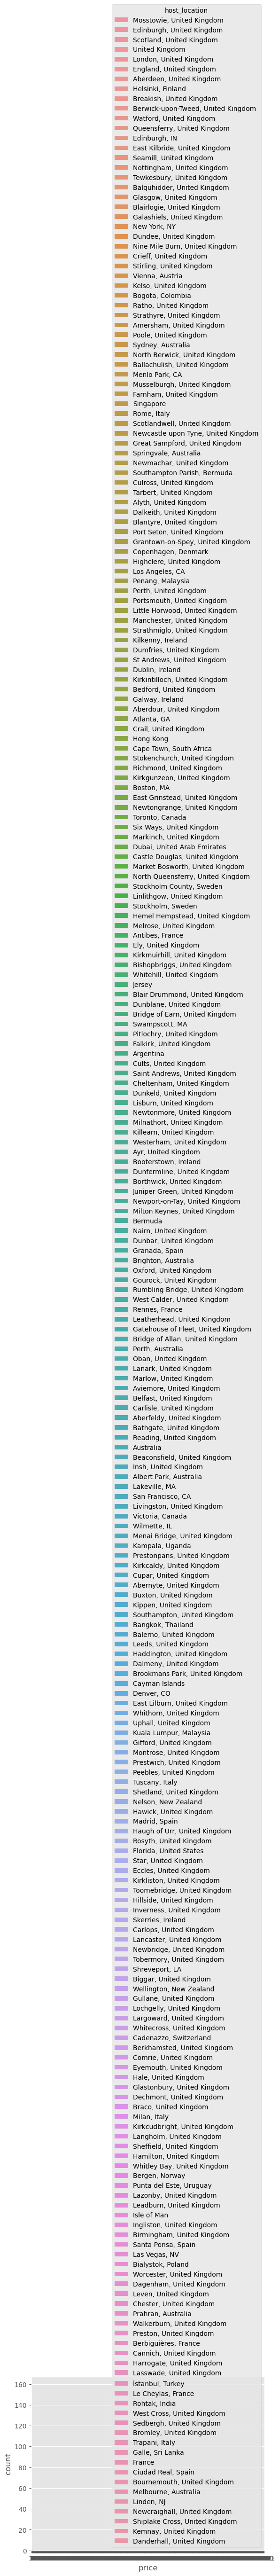

In [280]:
sns.countplot(x='price', hue='host_location', data=sorteddf)

In [44]:
#df['price'].hist(figsize=(10,5))

In [383]:
#df['price'].plot(kind='density',subplots=True,layout=(1,2),sharex=False)

In [277]:
#_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5)) 
#sns.countplot(x='price',data=sorteddf.head(100),ax=axes[0]) 
#sns.countplot(x='reviews_per_month',data=sorteddf.head(100),ax=axes[1])

In [358]:
#df['description'].value_counts(normalize=True)

In [353]:
#df.iloc[2:5,:9]

In [354]:
#df.info()
#df.head() و df.tail()
#df.shape، كما يمكن الحصول على أسماء الأعمدة كقائمة باستخدام الخاصية df.columns
#df.describe()
#df.describe(include=['object','bool']) 
#bool إلى نوع int باستخدام الدالة df['col_name'] = df['col_name'].astype('int')
#df[df.columns[4]]
#df['col_name'].value_counts()، ويمكن الحصول على النسب المئوية لكل قيمة باستخدام المعامل normalize=True.


### Sorting and Filtering 

In [ ]:
df.sort_values(by='Total day calls',ascending=False)
df.sort_values(by=['Total day calls','Total night calls'],ascending=[False,True])
df['Total day minutes'].mean()
df[df['Churn'] == 1]['Total day minutes'].mean()
df[df['Churn'] == 0]['Total day minutes'].mean()
df[df['Churn'] == 1].mean()
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total day calls'].min()
df.loc[:5,['International plan','State']]
df.iloc[:5,:4]
df.iloc[-1:]
df[-1:]

## Apply and Map

In [ ]:
df.apply(np.max)
df[df['State'].apply(lambda state: state[0]=='W')].head()
df[df['State'].apply(lambda state: state[0]=='W')].apply(np.max)
d = {'Yes':True, 'No':False}
df['InternationalPlan'] = df['InternationalPlan'].map(d)
df['InternationalPlan']


## Groupby 

In [ ]:
df.groupby(['Churn'])['Total day minutes', 'Total eve minutes', 'Total day minutes'].describe()
df.groupby(['Churn'])['Total day minutes', 'Total eve minutes', 'Total day minutes'].agg([np.mean, np.std, np.min, np.max])

## Summary Tables

In [ ]:
pd.crosstab(df['Churn'],df['Internationalplan'])

In [ ]:
pd.crosstab(df['Churn'],df['Internationalplan'], normalize = True)

In [ ]:
df.pivot_table(['Total day minutes', 'Total eve minutes', 'Total day minutes'],['Area code'], aggfunc = 'mean')

## Add col or remove row

In [ ]:
df['totals'] = df['Total day minutes'] + df['Total eve minutes'] + df['Total day minutes']
df.drop('totals', axis = 1)
df.drop([1,2])
df.iloc[2:,:]

## Predicting the Churn

In [ ]:
pd.crosstab(df['Churn'],df['Internationalplan'], normalize = True)
sns.countplot(x='Internationalplan', hue='Churn', data=df)
pd.crosstab(df['Churn'],df['CustomerServiceCalls'], normalize = True)
sns.countplot(x='CustomerServiceCalls', hue='Churn', data=df)
df['CSC'] = (df['CustomerServiceCalls'] > 3).astype('int')
pd.crosstab(df['Churn'],df['CustomerServiceCalls'], margins = True)
pd.crosstab(df['CSC']&df['Internationalplan'],df['Churns'], margins = True)

## AVAILABILITY

## LOCATION

## PROPERTY TYPE

## Visualisation...univariate

In [ ]:
يمكن البدء بتصور "univariate" للبيانات الرقمية وإنشاء قائمة تضم 2 ميزة كالتالي:

features = ['Total day minutes','Total intl calls']


يمكن إنشاء النوع الأول من الرسومات البيانية وهو الهيستوجرام (Histogram) الذي يوضح شكل توزيع البيانات في العمود المحدد، ويمكن رسمه على العمودين كالتالي:

df[features].hist(figsize=(10,5))



يمكن أيضًا رسم منحنى التوزيع (Distribution Curve) باستخدام "curve" بدلاً من "bars" كما هو الحال في الهيستوجرام، ويمكن رسمه على العمودين كالتالي:

df[features].plot(kind='density',subplots=True,layout=(1,2),sharex=False)



يتم استخدام "sharex" لضمان عدم وضع المحاور الأفقية للعمودين على نفس المحور الأفقي، لأن هذا سيؤدي إلى وجود محور أفقي كبير وآخر صغير.



يوجد أيضًا نوع آخر من الرسومات البيانية المسمى "distplot" والذي يوضح شكل توزيع البيانات في العمود المحدد، كما يمكن ملاحظة القيم الخارجة (Outliers) من خلال الرسم البياني الذي يُعرف بـ "boxplot"، كالتالي:

sns.distplot(df['Total intl calls'])

sns.boxplot(df['Total intl calls'])



يمكن أيضًا استخدام رسم "violin plot" لعرض البيانات، ولكن هذا النوع لا يوفر معلومات إضافية عن المربع الحدودي (Boxplot)، كالتالي:

sns.violinplot(df['Total intl calls'])



يمكن رؤية القيم الإحصائية الرقمية للبيانات باستخدام "describe"، ولكن هذا النوع من الرسومات البيانية لا يوفر انطباعًا واضحًا كما هو الحال في الرسومات البيانية الأخرى، كالتالي:

df[features].describe()

In [ ]:
1. البدء بإنشاء frequency table للـ categorical feature المراد استعراضه، على سبيل المثال، يمكن استخدام الامر التالي لاستعراض عدد المكالمات التي قام بها العملاء لخدمة العملاء والتي تم الاتفاق على أنها عامل مؤثر في الـ churn:

df['Customer service calls'].value_counts()



2. يمكن رسم رسمين بيانيين جنباً إلى جنب (subplot) في نفس الرسم البياني لاستعراض توزيع العملاء على الفئات المختلفة، على سبيل المثال، يمكن استخدام الأمر التالي لرسم رسمين بيانيين جنبًا إلى جنب يعرضان عدد الـ churn وعدد المكالمات الخدمية للعملاء:

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5)) sns.countplot(x='Churn',data=df,ax=axes[0]) sns.countplot(x='Customer service calls',data=df,ax=axes[1])



3. يمكن استخدام Pie chart لاستعراض الفئات المختلفة للـ categorical feature، وللقيام بذلك، يجب تنزيل حزمة plotly باستخدام الأمر التالي:

pip install plotly



4. يمكن استخدام حزمة plotly لرسم Pie chart لأي feature، على سبيل المثال، يمكن استخدام الأمر التالي لرسم Pie chart يعرض توزيع العملاء على عدد المكالمات الدولية الكلية (Total intl calls) والتي يمكن استخدامها لاستعراض تأثير الـ churn:

import plotly.express as px fig = px.pie(df,values='Total intl calls',names='Churn') fig.show()



بعد تنفيذ هذه الخطوات، يمكن رؤية تفاصيل أكثر حول توزيع الفئات المختلفة للـ categorical feature وكيف يؤثر على الـ churn.

In [ ]:
يمكن الاستعانة بالخطوات التالية لاستعراض الـ numerical features:

البدء بحساب الـ correlation للـ features المختلفة لمعرفة درجة الترابط بينها، ويمكن استخدام heatmap من seaborn لرسم الـ correlation matrix كما يلي:
plt.figure(figsize=(10,10)) sns.heatmap(df.corr(), annot=True)

الاستغناء عن الـ features الذين تم حساب الـ charge لهم والذين يعتمدون على الـ minutes، يمكن استخدام الأمر التالي لحذف هذه الـ features:
df.drop(['Total day charge','Total eve charge','Total night charge','Total intl charge'],axis=1,inplace=True)

يمكن استخدام scatter plot لرسم علاقة بين متغيرين، على سبيل المثال، يمكن استخدام الأمر التالي لرسم scatter plot لعلاقة بين عدد دقائق النهار وعدد دقائق الليل:
plt.scatter(df['Total day minutes'],df['Total night minutes'])

يمكن استخدام joinplot من seaborn لرسم scatter plot و histograms في نفس الرسم البياني، على سبيل المثال، يمكن استخدام الأمر التالي لرسم joinplot:
sns.jointplot(x='Total day minutes' , y = 'Total night minutes' , data=df, kind='scatter')

يمكن استخدام pairplot لاستعراض العلاقات بين جميع الـ features الرقمية المختلفة في نفس الرسم البياني، ويمكن تحديد عدد من الأعمدة للرسم وتحديد عمود معين لتلوين النقاط على أساس قيمها، يمكن استخدام الأمر التالي لرسم pairplot:
sns.pairplot(df)

بعد تنفيذ هذه الخطوات، يمكن استكشاف العلاقات بين المتغيرات المختلفة واستخدامها في تحليل البيانات والتنبؤ بالنتائج.



In [ ]:
يمكن استخدام categorical feature على scatter plot لتمثيل القيم بألوان مختلفة لكل فئة. لتحقيق ذلك، يمكن استخدام lmplot من Seaborn مع إضافة متغير الـ hue الذي يمثل الـ categorical feature كالتالي:



```

sns.lmplot(x='Total day minutes', y='Total night minutes', data=df, hue='Churn', fit_reg=False)

```



يمكن أيضًا استخدام boxplot أو violin plot لعرض العلاقة بين المتغيرات الرقمية والفئات الثنائية التي تمثل الـ churn. يمكن استخدام subplots لعرض الـ boxplot والـ violin plot بجانب بعضهما البعض كالتالي:



```

_, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,5))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0])

sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1])

```



يمكن أيضًا استخدام categorical feature ثالث مثل customer service calls وعرض boxplot للعلاقة بين Total day minutes و churn لكل قيمة من قيم customer service calls باستخدام catplot كالتالي:



```

sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls', data=df, kind='box', col_wrap=4, height=3, aspect=0.8)

```



من خلال هذه الرسومات، يمكن استنتاج أنه عندما يزيد عدد customer service calls عن 3، فإن العدد الإجمالي للدقائق ليس السبب في ترك العملاء للشركة، بل ينخفض أيضًا عدد الدقائق للعملاء الذين يتركون الخدمة

In [ ]:
يمكن استخدام الرسومات المختلفة مثل countplot و crosstab و groupby لاستكشاف العلاقات بين الفئات الثنائية والمتغيرات الفئوية المختلفة في تحليل البيانات باستخدام Python و Seaborn. 



يمكن استخدام countplot لعرض توزيع الفئات الثنائية وتأثيرها على الـ churn بألوان مختلفة. على سبيل المثال، يمكن استخدام countplot لعرض تأثير customer service calls على churn كالتالي:



```

sns.countplot(x='Customer service calls', hue='Churn', data=df)

```



يمكن أيضًا استخدام countplot لعرض تأثير International plan و Voice mail plan على churn كالتالي:



```

_, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,5))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0])

sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1])

```



من الرسومات السابقة، يمكن استنتاج أن International plan مؤثر في حين أن Voice mail plan غير مؤثر على قرار الـ churn.



يمكن استخدام crosstab لعرض توزيع العملاء على كل state ومعرفة عدد الـ churn بقيمة 0 وقيمة 1. على سبيل المثال:



```

pd.crosstab(df['State'], df['Churn']).T

```



من خلال هذه الرسمة، يمكن معرفة توزيع الـ churn بين الولايات. ولكن يمكن أن يكون الرقم صعبًا في القراءة، لذلك يمكن تحويل الأرقام إلى نسبة باستخدام groupby وإظهارها بترتيب تنازلي باستخدام sort_values. على سبيل المثال:



```

df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False)

```



من خلال هذه الرسمة، يمكن معرفة الولايات التي تمتلك أعلى نسبة churn والولايات التي تمتلك أدنى نسبة churn. 



باستخدام هذه الرسومات المختلفة، يمكن استكشاف العلاقات بين الفئات الثنائية والمتغيرات الفئوية المختلفة في تحليل البيانات باستخدام Python و Seaborn. 



أفضل Focus key: تحليل البيانات، countplot، crosstab، groupby، Python، Seaborn، الفئات الثنائية، المتغيرات الفئوية، customer service calls، International plan، Voice mail plan، State، Churn.



In [ ]:
يمكن استخدام خوارزمية TSNE لاستعراض البيانات بأكملها بدلاً من استكشاف كل عمود من البيانات بشكل منفصل. يقوم هذا النهج بتقليل عدد الأعمدة في البيانات، ويتم استخدامه باستخدام حزمة scikit-learn، والتي يجب تثبيتها باستخدام الأمر "pip install scikit-learn". يجب أن يتم عمل scaling للبيانات باستخدام standard scaler لأن TSNE تستغرق وقتًا أثناء التحليل.



بعد ذلك، يتم إزالة العمود "Churn" لأنه العمود الذي يتم التنبؤ به، ويتم إزالة العمود "State" لأنه يحتوي على عدد كبير من الولايات. يتم إعداد البيانات للاستخدام في TSNE عن طريق تعيين القيم المختلفة للـ "International plan" و "Voice mail plan" وتخزينها في "x". يتم تطبيق scaler على "x" وبعد ذلك يتم تطبيق TSNE. يتم تخزين النتائج في "x_red"، والتي تمثل البيانات بعد تقليل عدد الأعمدة، ويمكن استخدامها لرسم scatter plot.



يمكن إضافة "Churn" إلى الرسم البياني بتعيين اللونين البرتقالي والأزرق للقيمة "False" و "True" على التوالي. يمكن استخدام الـ "International plan" للبحث عن العملاء الذين قد يتركون الشركة، ويمكن رسم scatter plot للـ "International plan" بتعيين اللون البرتقالي والأزرق للقيم "Yes" و "No" على التوالي ويمكن ملاحظة التجمعات اللتي فيها العملاء الذين يتركون الشركة. وبالتالي، يمكن القول إن العملاء الذين يتركون الشركة هم الذين يتصلون بخدمة العملاء كثيرًا ولديهم international plan.



تلك هي الخطوات الأساسية التي يمكن اتباعها لتحليل البيانات باستخدام خوارزمية TSNE ورسم scatter plot لفهم العلاقات بين البيانات المختلفة. ومع ذلك، يجب ملاحظة أن هذا النهج بسيط جدًا ويمكن تحسينه باستخدام أدوات وتقنيات أخرى في تحليل البيانات.

In [2]:
import sklearn

In [3]:
from sklearn.manifold import TSNE

In [4]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x =  df.drop('Churn', 'State', axis=1) drop columns with either too many vars or the ones I'm trying to find

In [ ]:
.map({'No':0, 'Yes':1}) map categorical features

In [ ]:
xd = StandardScaler.fit_transform(x)
tsne = TSNE()
x_ = tsne.fit_transform(xd)

In [ ]:
x_

In [ ]:
x_.shape

In [ ]:
plt.scatter(x_[:,0], x_[:,1],c=df['inspected var'].map({False:'orange', True:'blue'}) alpha = 0.5)